# Exploring the Dataset


In [39]:
#%matplotlib inline
import pickle
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import csv

In [40]:

data_set = r"C:\Users\A\Desktop\neural networks\WESAD-data\S2"
#'/media/learner/6663-3462/WESAD/'
s2_path = data_set + '/S2.pkl'
# we have to change the encoding because the data appears to have been
# pickled with py2 and we are in py 3
with open(s2_path, 'rb') as file:
    s2_data = pickle.load(file, encoding='latin1')

# Loading data

In [41]:

#print(s2_data.keys())
#print(s2_data.values())
#print(s2_data.items())

c_ax=s2_data['signal']['chest']['ACC'][0:,0]#[baseline_to_plot]
c_ay=s2_data['signal']['chest']['ACC'][0:,1]#[baseline_to_plot]#[0:100] # hundred values
c_az=s2_data['signal']['chest']['ACC'][0:,2]#[baseline_to_plot]
c_ecg=s2_data['signal']['chest']['ECG'][:,0]#[baseline_to_plot]
c_emg=s2_data['signal']['chest']['EMG'][:,0]#[baseline_to_plot]
c_eda=s2_data['signal']['chest']['EDA'][:,0]#[baseline_to_plot]
c_temp=s2_data['signal']['chest']['Temp'][:,0]#[baseline_to_plot]
c_resp=s2_data['signal']['chest']['Resp'][:,0]#[baseline_to_plot]
w_ax=s2_data['signal']['wrist']['ACC'][0:,0]#[stress_to_plot]
w_ay=s2_data['signal']['wrist']['ACC'][0:,1]#[stress_to_plot]
w_az=s2_data['signal']['wrist']['ACC'][0:,2]#[stress_to_plot]
w_bvp=s2_data['signal']['wrist']['BVP'][:,0]#[stress_to_plot]
w_eda=s2_data['signal']['wrist']['EDA'][:,0]#[stress_to_plot]
w_temp=s2_data['signal']['wrist']['TEMP'][:,0]#[stress_to_plot]
w_label=s2_data['label']

print("Done")



Done


# Labels given in data set

baseline_indices 800800
stress_indices 430500
amusement_indices 253400
meditation_indices 537599


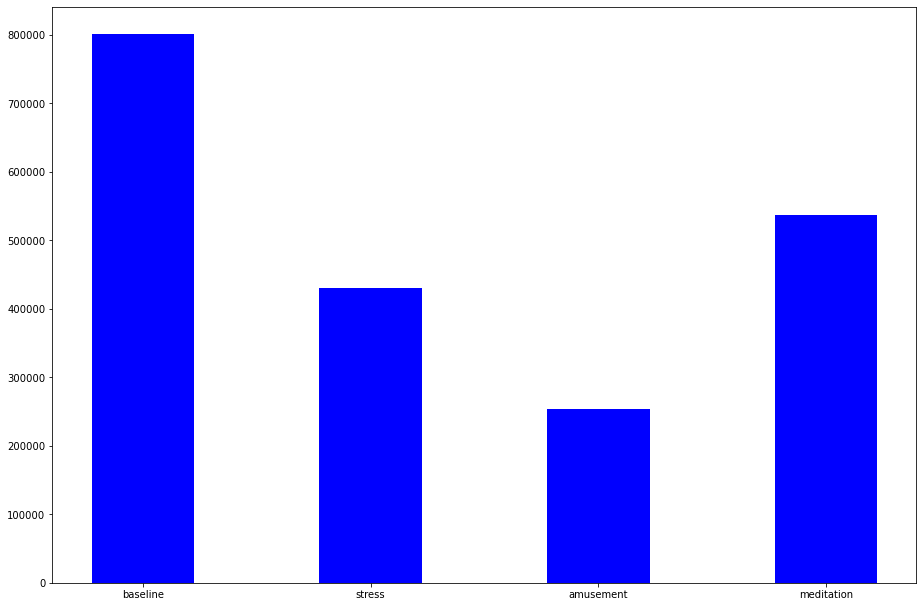

In [42]:

baseline_indices = np.nonzero(s2_data['label']==1)[0]
stress_indices = np.nonzero(s2_data['label']==2)[0]
amusement_indices = np.nonzero(s2_data['label']==3)[0]
meditation_indices = np.nonzero(s2_data['label']==4)[0]

print("baseline_indices", len(baseline_indices))
print("stress_indices", len(stress_indices))
print("amusement_indices", len(amusement_indices))
print("meditation_indices", len(meditation_indices))

fig = plt.figure()
ax = fig.add_axes([1,1,2,2])
langs = ["baseline", "stress", "amusement","meditation"]
y_ax = [len(baseline_indices),len(stress_indices),len(amusement_indices),len(meditation_indices)]
ax.bar(langs,y_ax,color = 'b', width = 0.45)
fig.savefig('f1.png')
plt.show()

# imbalanced data set

# Chest unit data is unbalanced with Wrist Unit data

c_ax 4255300
c_ay 4255300
c_az 4255300
c_ecg 4255300
c_emg 4255300
c_eda 4255300
c_temp 4255300
c_resp 4255300
w_ax 194528
w_ay 194528
w_az 194528
w_bvp 389056
w_eda 24316
w_temp 24316
[0 0 0 ... 0 0 0] 4255300
Min label value 0 Max label value 7


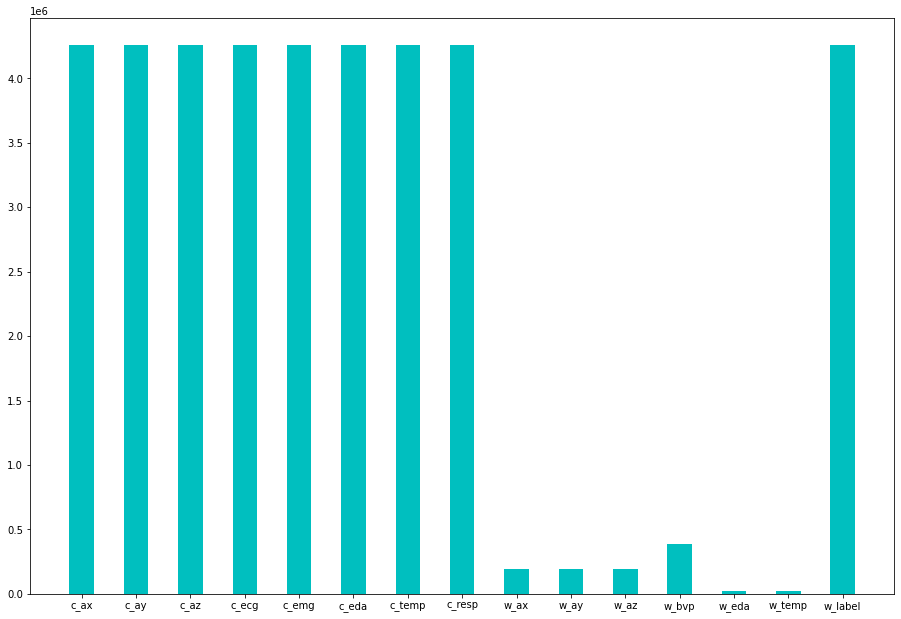

<Figure size 432x288 with 0 Axes>

In [43]:
%matplotlib inline
print("c_ax",len(c_ax))
print("c_ay",len(c_ay))
print("c_az",len(c_az))
print("c_ecg",len(c_ecg))
print("c_emg",len(c_emg))
print("c_eda",len(c_eda))
print("c_temp",len(c_temp))
print("c_resp",len(c_resp))
print("w_ax",len(w_ax))
print("w_ay",len(w_ay))
print("w_az",len(w_az))
print("w_bvp",len(w_bvp))
print("w_eda",len(w_eda))
print("w_temp",len(w_temp))
print(w_label, len(w_label))
print("Min label value", min(w_label), "Max label value",max(w_label))

fig = plt.figure()
ax = fig.add_axes([1,1,2,2])
langs = ["c_ax", "c_ay", "c_az","c_ecg","c_emg","c_eda","c_temp","c_resp","w_ax","w_ay","w_az","w_bvp","w_eda","w_temp","w_label"]
y_ax = [len(c_ax),len(c_ay),len(c_az),len(c_ecg),len(c_emg),len(c_eda),len(c_temp),len(c_resp),len(w_ax),len(w_ay),len(w_az),len(w_bvp),len(w_eda),len(w_temp),len(w_label)]
ax.bar(langs,y_ax,color = 'c', width = 0.45)

plt.show()
plt.savefig('f2.png',dpi=100)
#Since data samples from chest device are 21 times more than data samples of wrist device, thus data set is unbalanced,
#and data from wrsit sensor should be excluded. Chest device gives 4255300 samples per sensor, whereas wrist device gives only 194528 samples. 

# Converting pickle dictionary to Pandas Data frame

In [44]:
#numpy_data1=np.array([c_ax, c_ay, c_az,c_ecg,c_emg,c_eda,c_temp,c_resp,w_ax,w_ay,w_az,w_bvp,w_eda,w_temp])
numpy_data1=np.array([c_ax, c_ay, c_az,c_ecg,c_emg,c_eda,c_temp,c_resp,w_label])
numpy_data1=numpy_data1.T

#df = pd.DataFrame(data=numpy_data1, columns=["c_ax", "c_ay", "c_az","c_ecg","c_emg","c_eda","c_temp","c_resp","w_ax","w_ay","w_az","w_bvp","w_eda","w_temp"],orient='index') 
df = pd.DataFrame(data=numpy_data1, columns=["c_ax", "c_ay", "c_az","c_ecg","c_emg","c_eda","c_temp","c_resp","w_label"]) 

print("data frame combined")



data frame combined


# Shape and Size

In [45]:
print("shape",df.shape)

shape (4255300, 9)


# Box plot of Unclean data

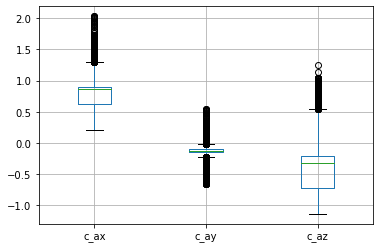

In [46]:
df.boxplot(column=['c_ax','c_ay','c_az'])



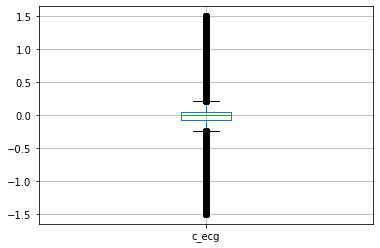

In [47]:
df.boxplot(column=['c_ecg'])

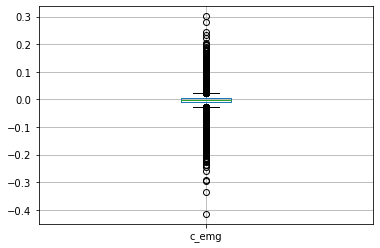

In [48]:
df.boxplot(column=['c_emg'])

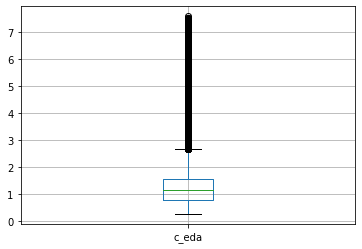

In [49]:
df.boxplot(column=['c_eda'])

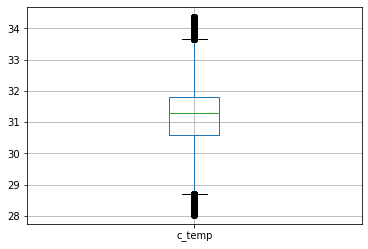

In [50]:
df.boxplot(column=['c_temp'])

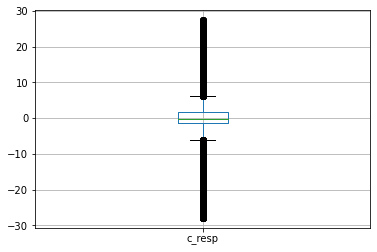

In [51]:
df.boxplot(column=['c_resp'])

# Calculating IQR and Outliers

In [53]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print("IQR is\n", IQR)
#print((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR)) )

IQR is
 c_ax       0.271200
c_ay       0.054000
c_az       0.507400
c_ecg      0.112335
c_emg      0.012314
c_eda      0.746918
c_temp     1.240173
c_resp     3.100586
w_label    2.000000
dtype: float64


# Removing Outliers

In [54]:
df_out = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
print(df_out.shape)


(2100456, 9)


# New Box Plot of cleaned data

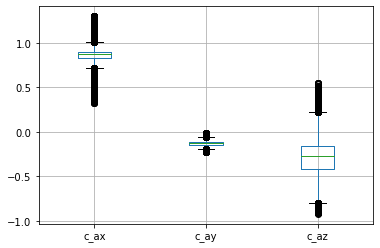

In [55]:
df_out.boxplot(column=['c_ax','c_ay','c_az'])

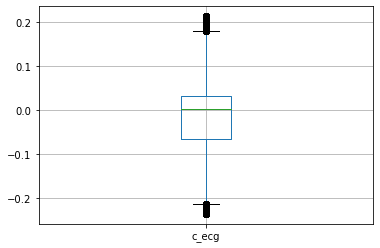

In [56]:
df_out.boxplot(column=['c_ecg'])

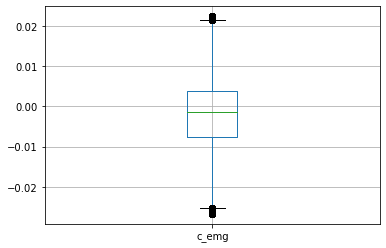

In [57]:
df_out.boxplot(column=['c_emg'])

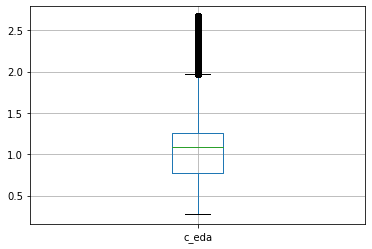

In [58]:
df_out.boxplot(column=['c_eda'])

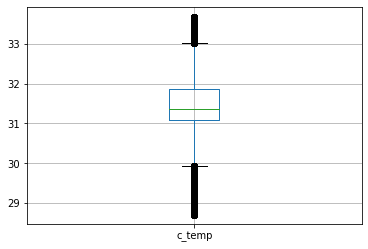

In [59]:
df_out.boxplot(column=['c_temp'])

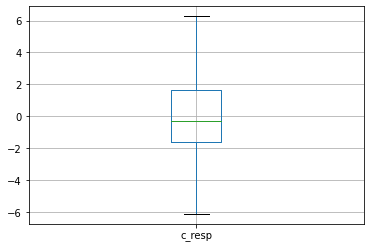

In [60]:
df_out.boxplot(column=['c_resp'])

# Describe

In [61]:
(df_out.describe())


,c_ax,c_ay,c_az,c_ecg,c_emg,c_eda,c_temp,c_resp,w_label
count,2.100456e+06,2.100456e+06,2.100456e+06,2.100456e+06,2.100456e+06,2.100456e+06,2.100456e+06,2.100456e+06,2.100456e+06
mean,8.317685e-01,-1.233951e-01,-3.003224e-01,-1.787775e-02,-1.975948e-03,1.091733e+00,3.144793e+01,-2.909448e-02,1.164535e+00
std,1.124673e-01,2.816034e-02,2.486282e-01,8.312552e-02,8.932746e-03,4.379497e-01,5.746423e-01,2.247824e+00,1.510026e+00
min,3.218000e-01,-2.308000e-01,-9.208000e-01,-2.364807e-01,-2.677917e-02,2.784729e-01,2.871490e+01,-6.132507e+00,0.000000e+00
25%,8.298000e-01,-1.418000e-01,-4.118000e-01,-6.573486e-02,-7.736206e-03,7.759094e-01,3.109299e+01,-1.637268e+00,0.000000e+00
50%,8.786000e-01,-1.258000e-01,-2.696000e-01,2.655029e-03,-1.419067e-03,1.082993e+00,3.136053e+01,-2.746582e-01,0.000000e+00
75%,9.018000e-01,-1.078000e-01,-1.558000e-01,3.240967e-02,3.936768e-03,1.254272e+00,3.186548e+01,1.618958e+00,2.000000e+00
max,1.298600e+00,-1.480001e-02,5.502000e-01,2.128601e-01,2.243042e-02,2.666855e+00,3.367465e+01,6.269836e+00,4.000000e+00


In [62]:
print("Mins",df.min())
print("Max",df.max())
print("STD",df.std())
print("After clean up")
print("Mins",df_out.min())
print("Max",df_out.max())
print("STD",df_out.std())

Mins c_ax        0.215000
c_ay       -0.660000
c_az       -1.135400
c_ecg      -1.499542
c_emg      -0.414963
c_eda       0.263214
c_temp     28.045258
c_resp    -27.903748
w_label     0.000000
dtype: float64
Max c_ax        2.029800
c_ay        0.539000
c_az        1.246800
c_ecg       1.499313
c_emg       0.300980
c_eda       7.576752
c_temp     34.370392
c_resp     27.378845
w_label     7.000000
dtype: float64
STD c_ax       0.175116
c_ay       0.064173
c_az       0.300236
c_ecg      0.154077
c_emg      0.011652
c_eda      1.238425
c_temp     1.281106
c_resp     2.917749
w_label    1.606596
dtype: float64
After clean up
Mins c_ax        0.321800
c_ay       -0.230800
c_az       -0.920800
c_ecg      -0.236481
c_emg      -0.026779
c_eda       0.278473
c_temp     28.714905
c_resp     -6.132507
w_label     0.000000
dtype: float64
Max c_ax        1.298600
c_ay       -0.014800
c_az        0.550200
c_ecg       0.212860
c_emg       0.022430
c_eda       2.666855
c_temp     33.674652
c_resp   

# Head

In [63]:
(df_out.head())

,c_ax,c_ay,c_az,c_ecg,c_emg,c_eda,c_temp,c_resp,w_label
393691,0.6430,-0.0600,-0.6966,-0.044998,-0.008011,2.652359,28.717804,-0.965881,1.0
394476,0.6408,-0.0638,-0.6892,-0.176926,-0.014557,2.648163,28.716339,1.914978,1.0
395154,0.6394,-0.0602,-0.6918,0.052231,0.009659,2.662659,28.719208,-1.673889,1.0
396635,0.6354,-0.0684,-0.6998,-0.138611,0.000000,2.662277,28.716339,2.491760,1.0
402178,0.6392,-0.0626,-0.6972,0.045822,-0.006775,2.648163,28.820953,2.105713,1.0


# Info

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4255300 entries, 0 to 4255299
Data columns (total 9 columns):
 #   Column   Dtype  
---  ------   -----  
 0   c_ax     float64
 1   c_ay     float64
 2   c_az     float64
 3   c_ecg    float64
 4   c_emg    float64
 5   c_eda    float64
 6   c_temp   float64
 7   c_resp   float64
 8   w_label  float64
dtypes: float64(9)
memory usage: 292.2 MB


In [29]:
(df_out.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2100456 entries, 393691 to 4255299
Data columns (total 9 columns):
 #   Column   Dtype  
---  ------   -----  
 0   c_ax     float64
 1   c_ay     float64
 2   c_az     float64
 3   c_ecg    float64
 4   c_emg    float64
 5   c_eda    float64
 6   c_temp   float64
 7   c_resp   float64
 8   w_label  float64
dtypes: float64(9)
memory usage: 160.3 MB


# Value counts

In [30]:
print(df_out["c_ax"].value_counts())

0.9102    18101
0.9114    15841
0.9086    15282
0.9138    14964
0.9118    14607
          ...  
1.1766        1
1.1780        1
1.1076        1
1.1066        1
0.4836        1
Name: c_ax, Length: 3973, dtype: int64


# Histogram

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B41600E1F0>,
      dtype=object)

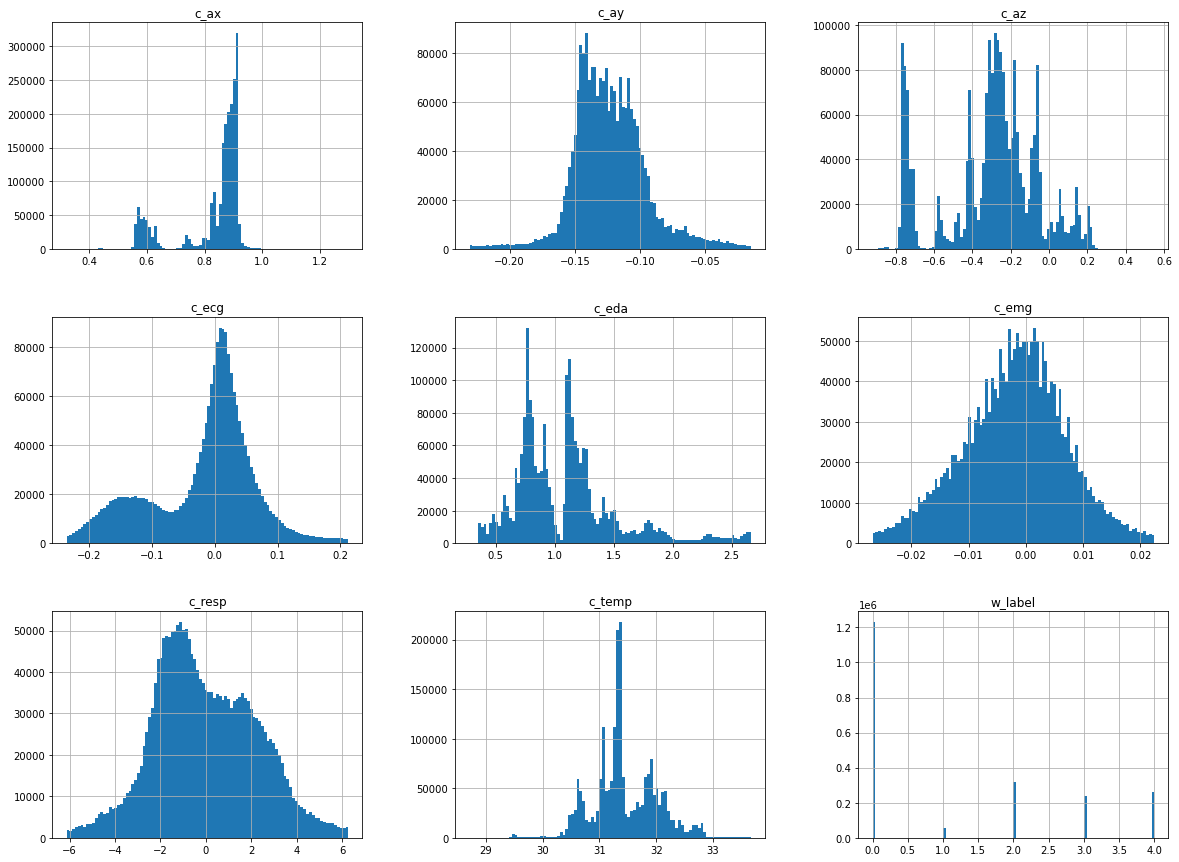

In [31]:
df_out.hist(bins=100, figsize = (20,15))
#pyplot.hist(df_out)

# Correlation Matrix

In [32]:
corr_matrix=df_out.corr()
#corr_matrix ["c_ax"].sort_values(ascending=False)
(corr_matrix)

,c_ax,c_ay,c_az,c_ecg,c_emg,c_eda,c_temp,c_resp,w_label
c_ax,1.000000,-0.023870,0.890463,-0.009258,-0.001814,0.086628,0.121247,-0.018757,-0.509452
c_ay,-0.023870,1.000000,0.027892,0.004532,-0.001511,-0.023619,-0.063603,-0.016261,-0.228733
c_az,0.890463,0.027892,1.000000,-0.004805,-0.002277,-0.138557,0.236908,0.001604,-0.410491
c_ecg,-0.009258,0.004532,-0.004805,1.000000,-0.005601,-0.022128,0.014425,0.064024,0.003692
c_emg,-0.001814,-0.001511,-0.002277,-0.005601,1.000000,-0.005357,-0.003173,-0.000339,-0.006690
c_eda,0.086628,-0.023619,-0.138557,-0.022128,-0.005357,1.000000,-0.541162,-0.030029,-0.119094
c_temp,0.121247,-0.063603,0.236908,0.014425,-0.003173,-0.541162,1.000000,0.019251,0.172247
c_resp,-0.018757,-0.016261,0.001604,0.064024,-0.000339,-0.030029,0.019251,1.000000,-0.003661
w_label,-0.509452,-0.228733,-0.410491,0.003692,-0.006690,-0.119094,0.172247,-0.003661,1.000000


# Line plot

Text(0, 0.5, 'sensor amplitude')

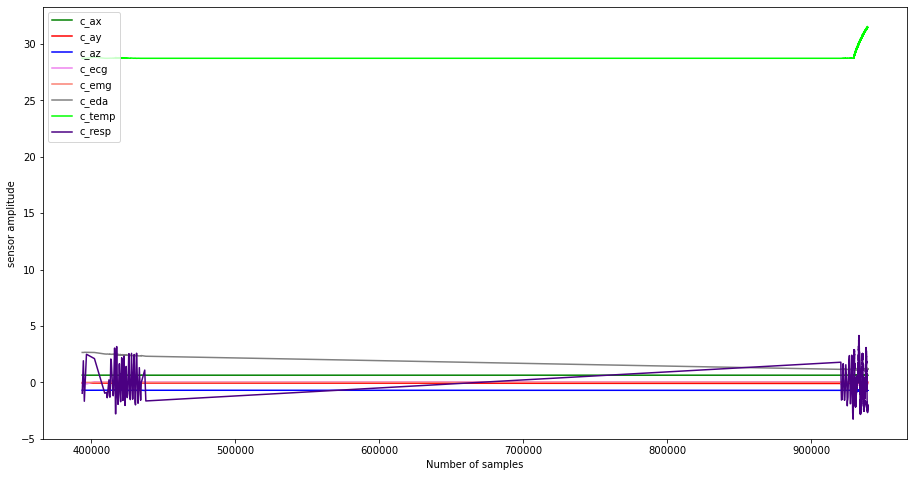

In [33]:
# gca stands for 'get current axis'
#ax = plt.gca()
lens=np.arange(len(df_out['c_ax'][:500]))

fig= plt.figure(figsize=(6,3))
axes= fig.add_axes([0.1,0.1,2,2])

axes.plot(df_out['c_ax'][:9000],color='green', label="c_ax")
axes.plot(df_out['c_ay'][:9000],color='red', label="c_ay")
axes.plot(df_out['c_az'][:9000],color='blue', label="c_az")
axes.plot(df_out['c_ecg'][:9000],color='violet', label="c_ecg")
axes.plot(df_out['c_emg'][:9000],color='salmon', label="c_emg")
axes.plot(df_out['c_eda'][:9000],color='grey', label="c_eda")
axes.plot(df_out['c_temp'][:9000],color='lime', label="c_temp")
axes.plot(df_out['c_resp'][:9000],color='indigo', label="c_resp")

plt.legend(loc='upper left')
plt.xlabel("Number of samples")
plt.ylabel("sensor amplitude")
#df_out[:500].plot(kind='line',x='c_ax',y='c_ay',color='green',ax=ax)
#df_out[:500].plot(kind='line',x='c_ax',y='c_az', color='red', ax=ax)

#plt.show()

# Splitting baseline, stress, and meditation data


 1000 1000 



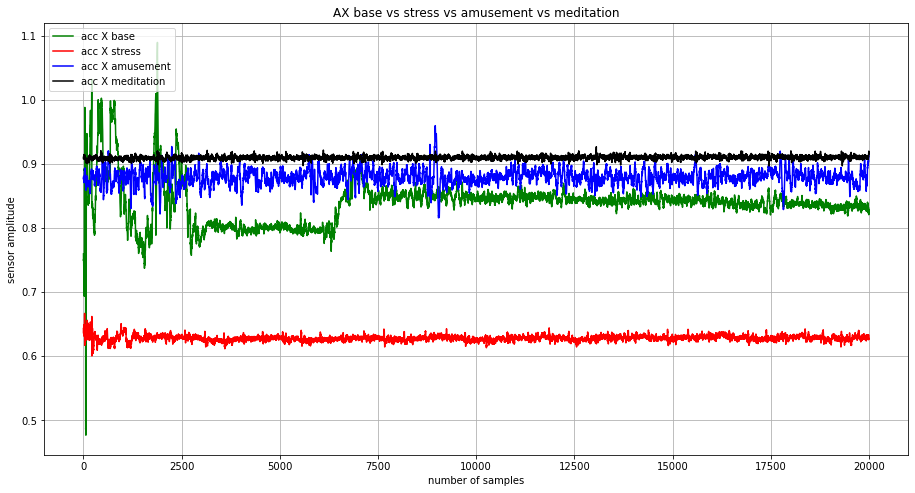

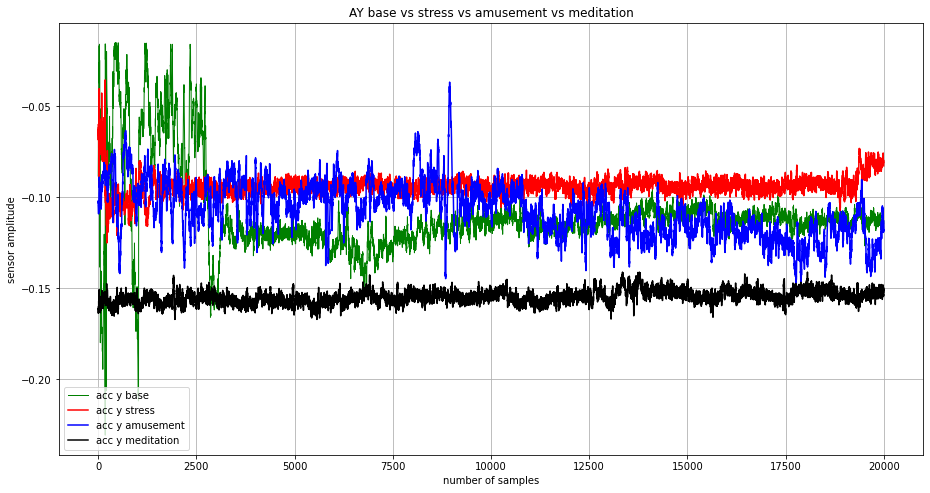

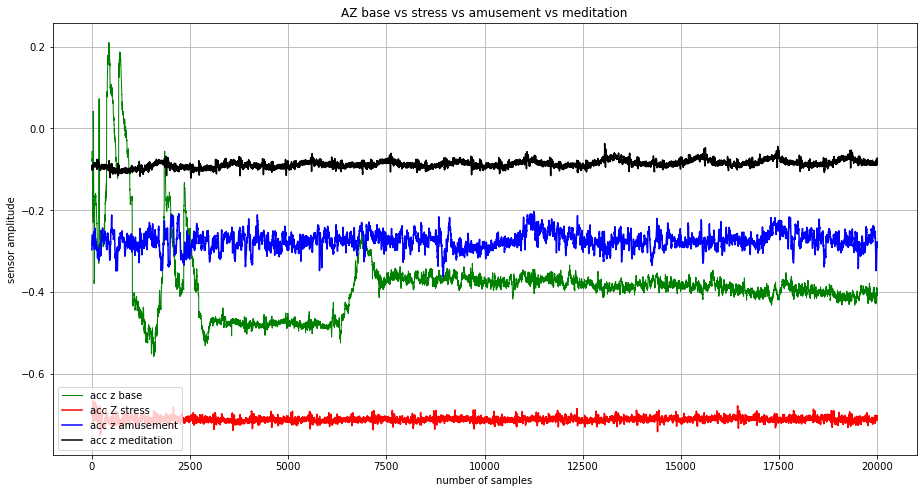

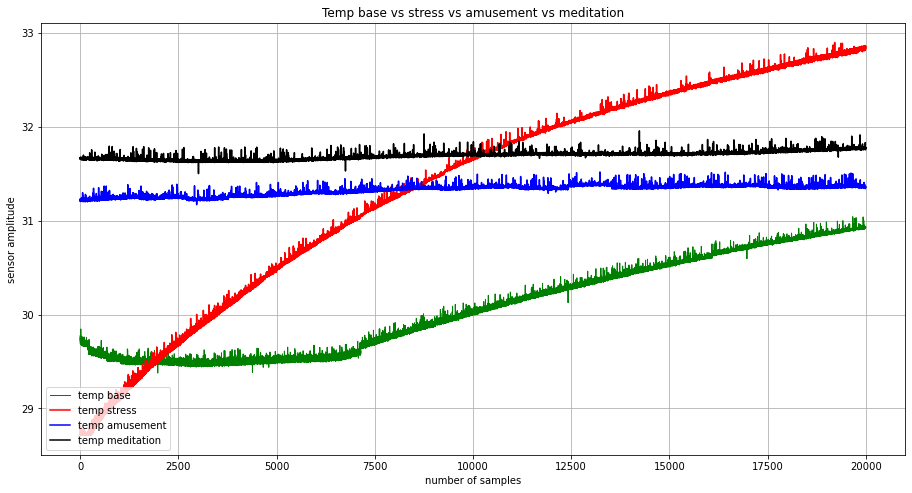

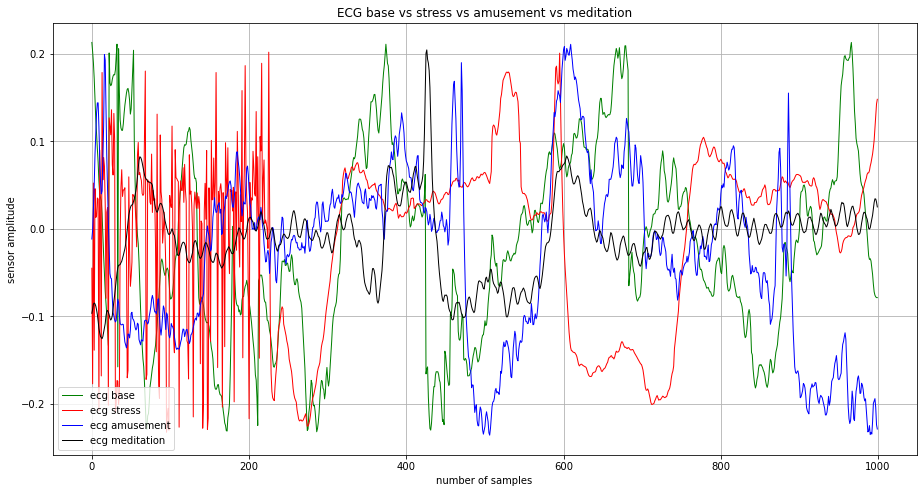

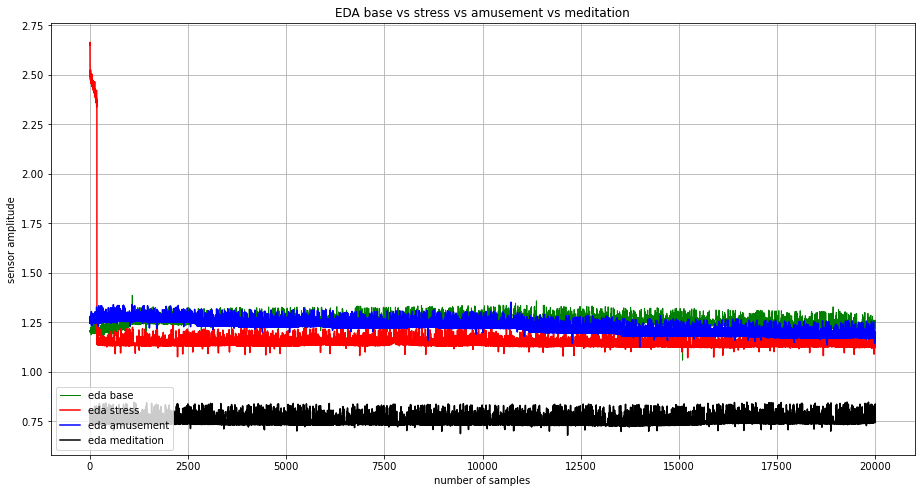

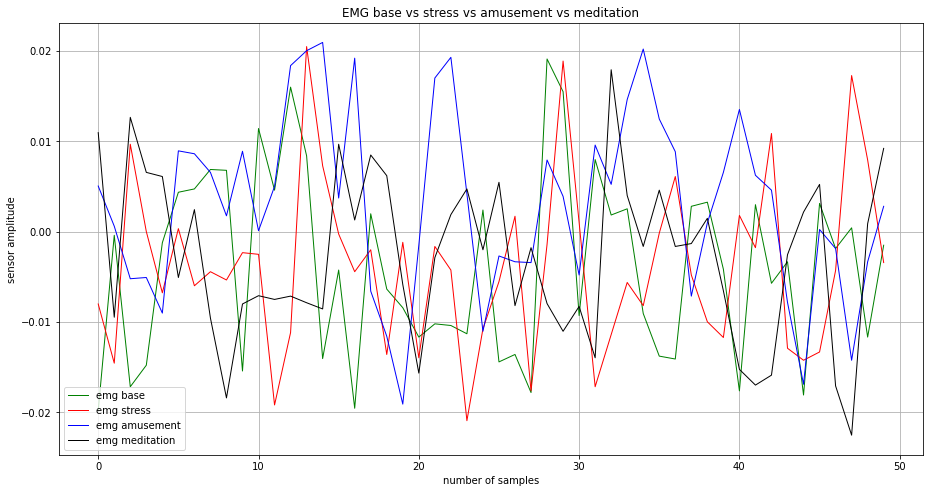

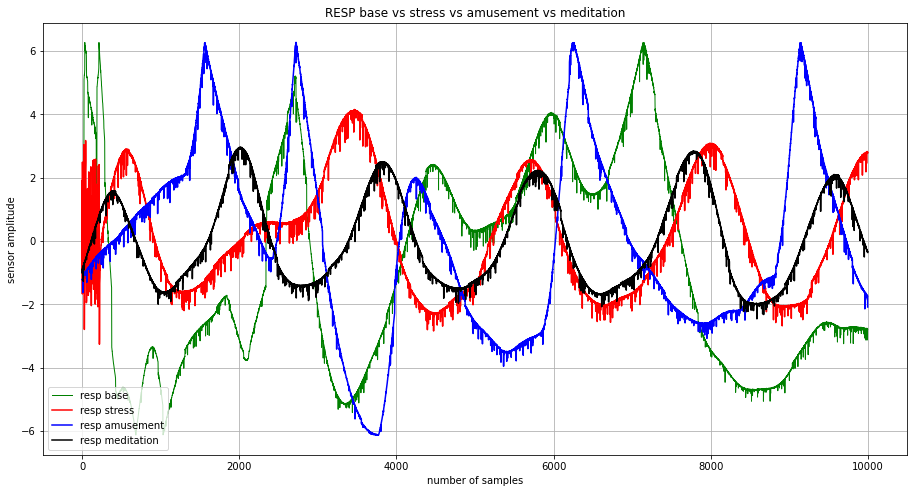

In [34]:
base_df = df_out.loc[(df_out['w_label'] == 0)]
stress_df = df_out.loc[(df_out['w_label'] == 1)]
amus_df = df_out.loc[(df_out['w_label'] == 2)]
medi_df = df_out.loc[(df_out['w_label'] == 3)]

y_ax=base_df["c_ax"][:20000].values
y_ax_s=stress_df["c_ax"][:20000].values
y_ax_a=amus_df["c_ax"][:20000].values
y_ax_m=medi_df["c_ax"][:20000].values
x_ax=np.arange(len(y_ax))


y_ay=base_df["c_ay"][:20000].values
y_ay_s=stress_df["c_ay"][:20000].values
y_ay_a=amus_df["c_ay"][:20000].values
y_ay_m=medi_df["c_ay"][:20000].values
x_ay=np.arange(len(y_ay))

y_az=base_df["c_az"][:20000].values
y_az_s=stress_df["c_az"][:20000].values
y_az_a=amus_df["c_az"][:20000].values
y_az_m=medi_df["c_az"][:20000].values
x_az=np.arange(len(y_az))

y_ecg=base_df["c_ecg"][:1000].values
y_ecg_s=stress_df["c_ecg"][:1000].values
y_ecg_a=amus_df["c_ecg"][:1000].values
y_ecg_m=medi_df["c_ecg"][:1000].values
x_ecg=np.arange(len(y_ecg))
print("\n",len(x_ecg),len(y_ecg),"\n")

y_emg=base_df["c_emg"][:50].values
y_emg_s=stress_df["c_emg"][:50].values
y_emg_a=amus_df["c_emg"][:50].values
y_emg_m=medi_df["c_emg"][:50].values
x_emg=np.arange(len(y_emg))

y_eda=base_df["c_eda"][:20000].values
y_eda_s=stress_df["c_eda"][:20000].values
y_eda_a=amus_df["c_eda"][:20000].values
y_eda_m=medi_df["c_eda"][:20000].values
x_eda=np.arange(len(y_eda))

y_temp=base_df["c_temp"][:20000].values
y_temp_s=stress_df["c_temp"][:20000].values
y_temp_a=amus_df["c_temp"][:20000].values
y_temp_m=medi_df["c_temp"][:20000].values
x_temp=np.arange(len(y_temp))

y_resp=base_df["c_resp"][:10000].values
y_resp_s=stress_df["c_resp"][:10000].values
y_resp_a=amus_df["c_resp"][:10000].values
y_resp_m=medi_df["c_resp"][:10000].values
x_resp=np.arange(len(y_resp))

#ax1 = plt.gca()
fig= plt.figure(figsize=(6,3))
ax1= fig.add_axes([0.1,0.1,2,2])
#fig1, ax1 = plt.subplots()
ax1.plot(x_ax,y_ax,color='green',label="acc X base")
ax1.plot(x_ax,y_ax_s,color='red',label="acc X stress")
ax1.plot(x_ax,y_ax_a,color='blue',label="acc X amusement")
ax1.plot(x_ax,y_ax_m,color='black',label="acc X meditation")
ax1.set(xlabel='number of samples', ylabel = 'sensor amplitude', title = 'AX base vs stress vs amusement vs meditation')
ax1.grid()
plt.legend(loc='upper left')
plt.show()

#ax1 = plt.gca()
fig= plt.figure(figsize=(6,3))
ax1= fig.add_axes([0.1,0.1,2,2])
ax1.plot(x_ax,y_ay,color='green',label="acc y base",LineWidth = 1)
ax1.plot(x_ax,y_ay_s,color='red',label="acc y stress")
ax1.plot(x_ax,y_ay_a,color='blue',label="acc y amusement")
ax1.plot(x_ax,y_ay_m,color='black',label="acc y meditation")
ax1.set(xlabel='number of samples', ylabel = 'sensor amplitude', title = 'AY base vs stress vs amusement vs meditation')
ax1.grid()
plt.legend(loc='lower left')
plt.show()

#ax1 = plt.gca()
fig= plt.figure(figsize=(6,3))
ax1= fig.add_axes([0.1,0.1,2,2])
ax1.plot(x_ax,y_az,color='green',label="acc z base",LineWidth = 1)
ax1.plot(x_ax,y_az_s,color='red',label="acc Z stress")
ax1.plot(x_ax,y_az_a,color='blue',label="acc z amusement")
ax1.plot(x_ax,y_az_m,color='black',label="acc z meditation")
ax1.set(xlabel='number of samples', ylabel = 'sensor amplitude', title = 'AZ base vs stress vs amusement vs meditation')
ax1.grid()
plt.legend(loc='lower left')
plt.show()

#ax1 = plt.gca()
fig= plt.figure(figsize=(6,3))
ax1= fig.add_axes([0.1,0.1,2,2])
ax1.plot(x_temp,y_temp,color='green',label="temp base",LineWidth = 1)
ax1.plot(x_temp,y_temp_s,color='red',label="temp stress")
ax1.plot(x_temp,y_temp_a,color='blue',label="temp amusement")
ax1.plot(x_temp,y_temp_m,color='black',label="temp meditation")
ax1.set(xlabel='number of samples', ylabel = 'sensor amplitude', title = 'Temp base vs stress vs amusement vs meditation')
ax1.grid()
plt.legend(loc='lower left')
plt.show()

#ax1 = plt.gca()
fig= plt.figure(figsize=(6,3))
ax1= fig.add_axes([0.1,0.1,2,2])
ax1.plot(x_ecg,y_ecg,color='green',label="ecg base",LineWidth = 1)
ax1.plot(x_ecg,y_ecg_s,color='red',label="ecg stress",LineWidth = 1)
ax1.plot(x_ecg,y_ecg_a,color='blue',label="ecg amusement",LineWidth = 1)
ax1.plot(x_ecg,y_ecg_m,color='black',label="ecg meditation",LineWidth = 1)
ax1.set(xlabel='number of samples', ylabel = 'sensor amplitude', title = 'ECG base vs stress vs amusement vs meditation')
ax1.grid()
plt.legend(loc='lower left')
plt.show()

#ax1 = plt.gca()
fig= plt.figure(figsize=(6,3))
ax1= fig.add_axes([0.1,0.1,2,2])
ax1.plot(x_eda,y_eda,color='green',label="eda base",LineWidth = 1)
ax1.plot(x_eda,y_eda_s,color='red',label="eda stress")
ax1.plot(x_eda,y_eda_a,color='blue',label="eda amusement")
ax1.plot(x_eda,y_eda_m,color='black',label="eda meditation")
ax1.set(xlabel='number of samples', ylabel = 'sensor amplitude', title = 'EDA base vs stress vs amusement vs meditation')
ax1.grid()
plt.legend(loc='lower left')
plt.show()

#ax1 = plt.gca()
fig= plt.figure(figsize=(6,3))
ax1= fig.add_axes([0.1,0.1,2,2])
ax1.plot(x_emg,y_emg,color='green',label="emg base",LineWidth = 1)
ax1.plot(x_emg,y_emg_s,color='red',label="emg stress",LineWidth = 1)
ax1.plot(x_emg,y_emg_a,color='blue',label="emg amusement",LineWidth = 1)
ax1.plot(x_emg,y_emg_m,color='black',label="emg meditation",LineWidth = 1)
ax1.set(xlabel='number of samples', ylabel = 'sensor amplitude', title = 'EMG base vs stress vs amusement vs meditation')
ax1.grid()
plt.legend(loc='lower left')
plt.show()

fig= plt.figure(figsize=(6,3))
ax1= fig.add_axes([0.1,0.1,2,2])
ax1.plot(x_resp,y_resp,color='green',label="resp base",LineWidth = 1)
ax1.plot(x_resp,y_resp_s,color='red',label="resp stress")
ax1.plot(x_resp,y_resp_a,color='blue',label="resp amusement")
ax1.plot(x_resp,y_resp_m,color='black',label="resp meditation")
ax1.set(xlabel='number of samples', ylabel = 'sensor amplitude', title = 'RESP base vs stress vs amusement vs meditation')
ax1.grid()
plt.legend(loc='lower left')
plt.show()

# Split data  Baseline, Stress, Amusement and Meditation

In [35]:
base_df.describe()


,c_ax,c_ay,c_az,c_ecg,c_emg,c_eda,c_temp,c_resp,w_label
count,1.230433e+06,1.230433e+06,1.230433e+06,1.230433e+06,1.230433e+06,1.230433e+06,1.230433e+06,1.230433e+06,1230433.0
mean,8.650659e-01,-1.184192e-01,-2.358937e-01,-1.777447e-02,-1.918047e-03,1.072221e+00,3.136766e+01,2.394844e-03,0.0
std,6.450042e-02,3.159451e-02,2.058045e-01,8.352993e-02,9.542821e-03,4.045076e-01,5.779942e-01,2.366430e+00,0.0
min,3.302000e-01,-2.308000e-01,-9.096000e-01,-2.364807e-01,-2.677917e-02,2.784729e-01,2.937723e+01,-6.132507e+00,0.0
25%,8.442000e-01,-1.374000e-01,-3.698000e-01,-6.706238e-02,-8.193970e-03,7.656097e-01,3.093903e+01,-1.763916e+00,0.0
50%,8.830000e-01,-1.162000e-01,-2.502000e-01,1.693726e-03,-1.510620e-03,1.108932e+00,3.132962e+01,-2.380371e-01,0.0
75%,9.026000e-01,-1.022000e-01,-1.356000e-01,3.236389e-02,4.577637e-03,1.225281e+00,3.184772e+01,1.803589e+00,0.0
max,1.298600e+00,-1.480001e-02,5.502000e-01,2.128601e-01,2.243042e-02,2.666855e+00,3.312662e+01,6.269836e+00,0.0


In [36]:
stress_df.describe()


,c_ax,c_ay,c_az,c_ecg,c_emg,c_eda,c_temp,c_resp,w_label
count,53659.000000,53659.000000,53659.000000,53659.000000,53659.000000,53659.000000,53659.000000,53659.000000,53659.0
mean,0.644033,-0.082243,-0.682666,-0.014250,-0.001975,1.128781,31.701952,0.290094,1.0
std,0.055506,0.026508,0.112778,0.106077,0.007993,0.081005,1.318731,1.941966,0.0
min,0.503800,-0.230800,-0.778200,-0.236435,-0.026779,1.016235,28.714905,-6.127930,1.0
25%,0.626800,-0.095000,-0.713000,-0.111443,-0.006821,1.104736,30.516602,-1.298523,1.0
50%,0.630200,-0.088200,-0.708400,0.027649,-0.001419,1.128387,31.875854,0.221252,1.0
75%,0.636200,-0.061800,-0.701400,0.057541,0.003159,1.140976,32.891510,1.899719,1.0
max,1.297800,-0.014800,0.547400,0.212814,0.022430,2.662659,33.674652,6.266785,1.0


In [37]:
amus_df.describe()


,c_ax,c_ay,c_az,c_ecg,c_emg,c_eda,c_temp,c_resp,w_label
count,316935.000000,316935.000000,316935.000000,316935.000000,316935.000000,316935.000000,316935.000000,316935.000000,316935.0
mean,0.878746,-0.131535,-0.269619,-0.021854,-0.002042,1.628508,31.230621,-0.347061,2.0
std,0.014980,0.015843,0.036298,0.080707,0.008737,0.439011,0.120433,2.580905,0.0
min,0.707400,-0.230800,-0.444200,-0.236481,-0.026779,0.971603,30.927307,-6.132507,2.0
25%,0.870600,-0.141600,-0.292600,-0.072098,-0.007782,1.274109,31.097382,-2.194214,2.0
50%,0.877800,-0.132800,-0.275400,-0.002380,-0.001556,1.467133,31.263428,-0.518799,2.0
75%,0.885800,-0.124000,-0.254200,0.028244,0.003983,1.848221,31.328125,1.414490,2.0
max,1.145400,-0.015000,-0.011000,0.212814,0.022430,2.666855,31.580170,6.269836,2.0


In [38]:
medi_df.describe() 

,c_ax,c_ay,c_az,c_ecg,c_emg,c_eda,c_temp,c_resp,w_label
count,239191.000000,239191.000000,239191.000000,239191.000000,239191.000000,239191.000000,239191.000000,239191.000000,239191.0
mean,0.908246,-0.146495,-0.096748,-0.015975,-0.002201,0.737416,32.192064,0.059902,3.0
std,0.006777,0.008612,0.051844,0.066794,0.008332,0.087991,0.311224,2.026582,0.0
min,0.839800,-0.182800,-0.277400,-0.235794,-0.026779,0.445175,31.501953,-6.132507,3.0
25%,0.902600,-0.150600,-0.165200,-0.040375,-0.007507,0.687027,31.945496,-1.695251,3.0
50%,0.910200,-0.146200,-0.071000,0.000778,-0.001694,0.744247,32.144348,-0.416565,3.0
75%,0.912800,-0.143000,-0.058600,0.018997,0.003479,0.798798,32.380981,1.899719,3.0
max,0.983200,-0.015000,0.022200,0.212814,0.022430,0.994110,33.055939,6.269836,3.0
